In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-darkgrid')
sns.set_style('darkgrid')

/tmp/ipykernel_910/1844404232.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


In [9]:
df = pd.read_csv("fcc-forum-pageviews.csv")
df["date"] = pd.to_datetime(df["date"])
df.set_index("date",inplace=True)

In [13]:
u = df['value'].quantile(0.025)
p = df['value'].quantile(0.975)
df =  df[(df['value'] >= u) & (df['value'] <= p)]

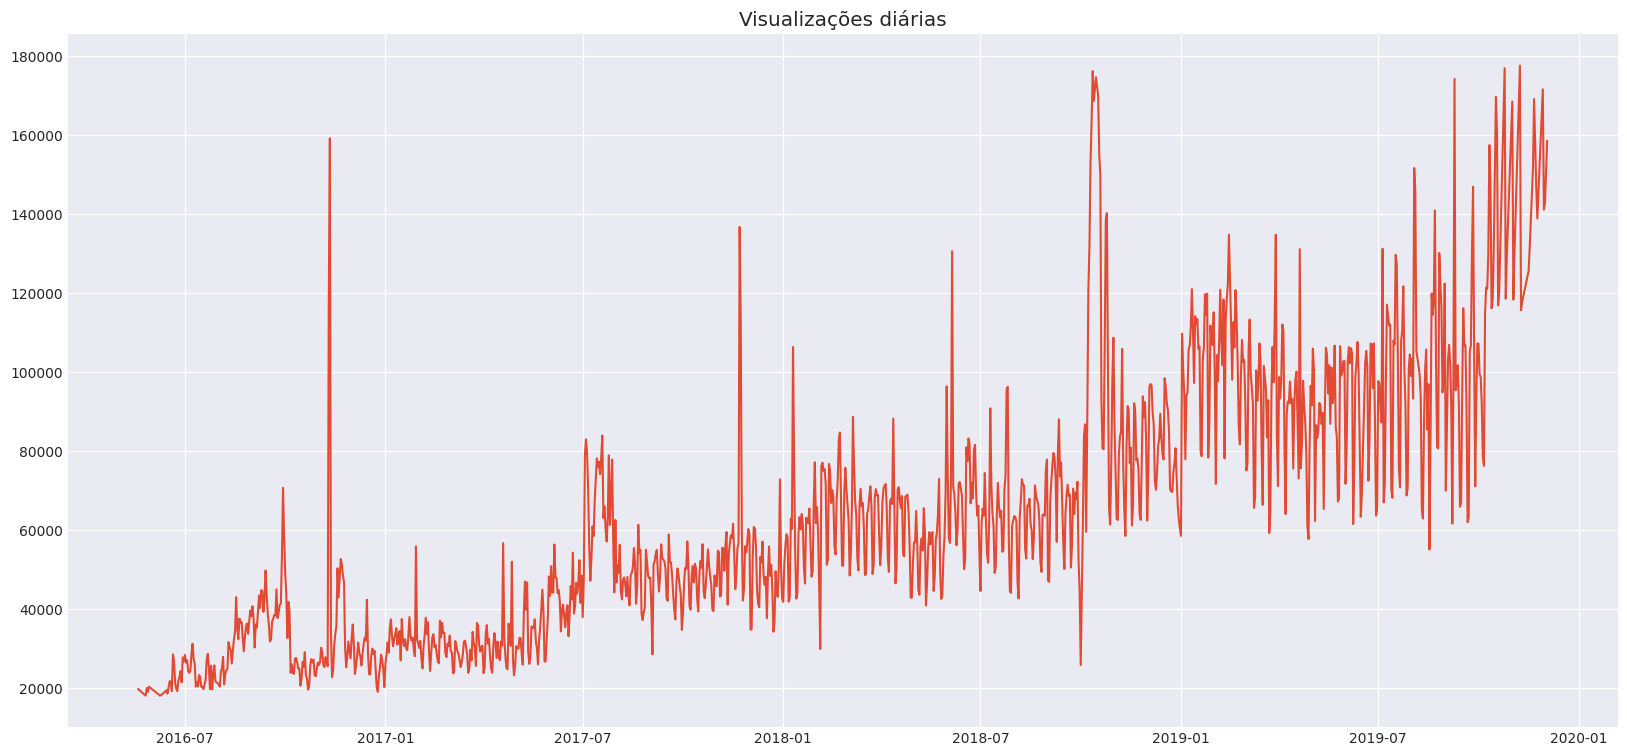

In [63]:
plt.figure(figsize=(20,9))
plt.plot(df.index,df["value"])
plt.title("Visualizações diárias")
plt.show()

In [39]:
df_bar = df.copy()
df_bar['month'] = pd.DatetimeIndex(df_bar.index).month
df_bar['year'] = pd.DatetimeIndex(df_bar.index).year
df_bar = df_bar.groupby(['year','month'])['value'].mean()
df_bar = df_bar.unstack()

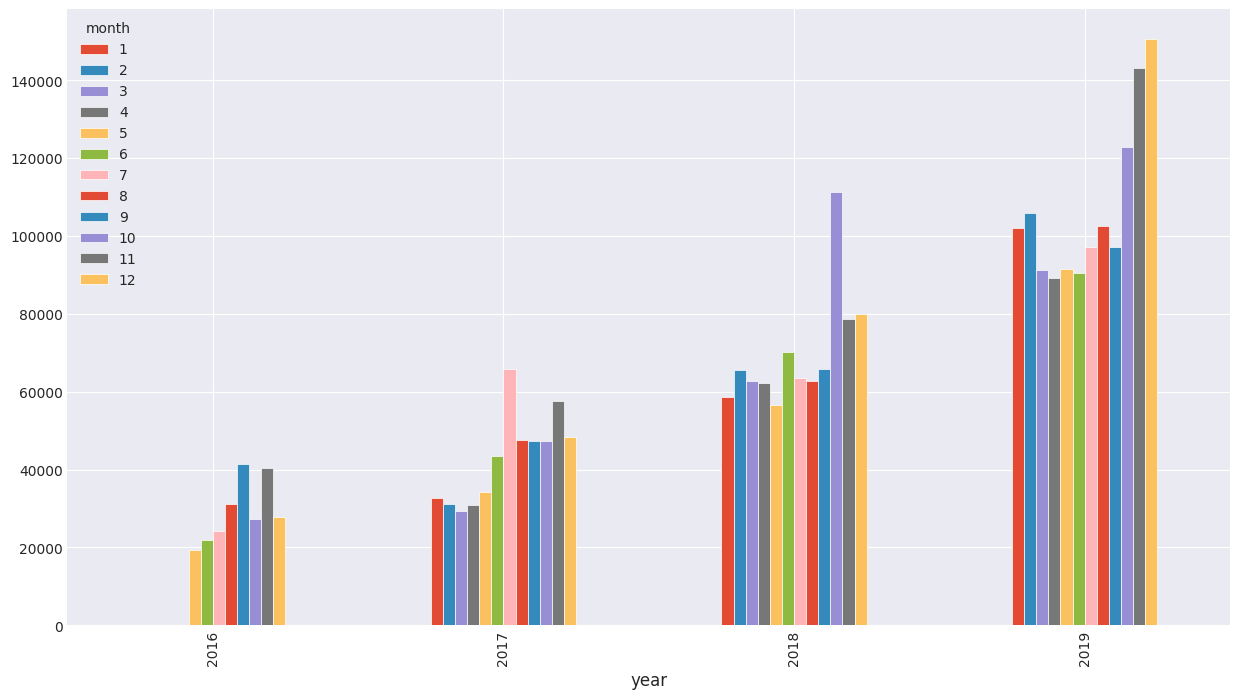

In [62]:
fig = df_bar.plot(kind='bar',figsize=(15,8)).figure

<Axes: xlabel='date', ylabel='value'>

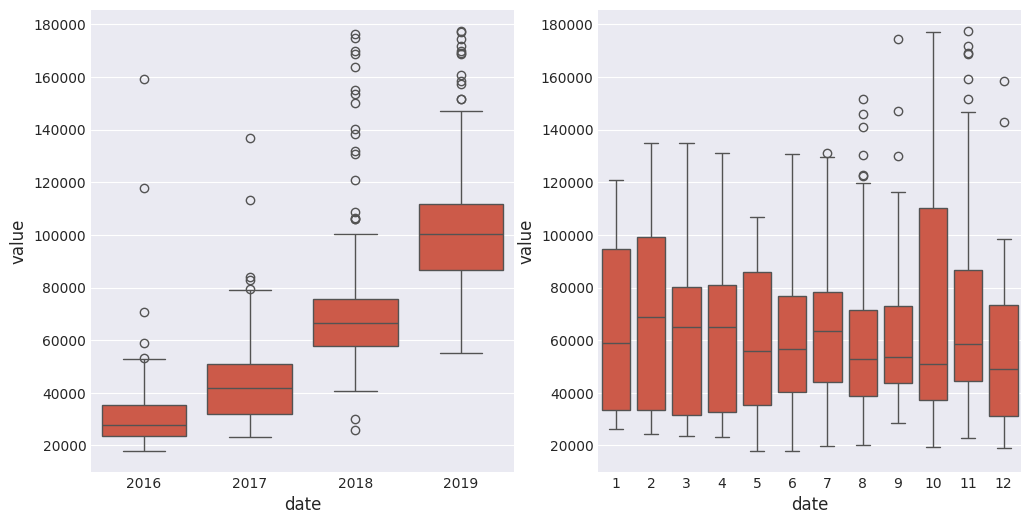

In [61]:
df_box = df.copy()
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
sns.boxplot(ax=axes[0],data=df_box, x=df.index.year, y="value")
sns.boxplot(ax=axes[1],data=df_box, x=df.index.month, y="value")